In [1]:
from utils import generate_real_samples, generate_latent_points, load_real_samples, generate_fake_samples, generate_images
from numpy import ones
import matplotlib.pyplot as plt
from statistics import mean
from wgan import WGAN
from tensorflow.keras.models import load_model

In [2]:
# Train Loop
def train(g_model, d_model, wgan_model, dataset, latent_dim, n_epochs=10, n_batch=64, n_critic=5):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    n_steps = bat_per_epo * n_epochs
    half_batch = int(n_batch / 2)
    c1_hist, c2_hist, g_hist = list(), list(), list()

    for i in range(n_steps):
        c1_tmp, c2_tmp = list(), list()

        for _ in range(n_critic):
            X_real, y_real = generate_real_samples(dataset, half_batch)
            c_loss1 = d_model.train_on_batch(X_real, y_real)
            c1_tmp.append(c_loss1)
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            c_loss2 = d_model.train_on_batch(X_fake, y_fake)
            c2_tmp.append(c_loss2)

        c1_hist.append(mean(c1_tmp))
        c2_hist.append(mean(c2_tmp))
        X_gan = generate_latent_points(latent_dim, n_batch)
        y_gan = -ones((n_batch, 1))
        g_loss = wgan_model.train_on_batch(X_gan, y_gan)
        g_hist.append(g_loss)

        print('> %d, c1=%.3f, c2=%.3f g=%.3f' % (i+1, c1_hist[-1], c2_hist[-1], g_loss))

    plt.plot(c1_hist, label='crit_real')
    plt.plot(c2_hist, label='crit_fake')
    plt.plot(g_hist, label='gen')
    plt.legend()
    plt.savefig('plot_line_plot_loss.png')
    plt.close()

In [3]:
dataset = load_real_samples()
latent_dim = 50
wgan = WGAN(dataset.shape, latent_dim)
discriminator = wgan.build_discriminator()
generator = wgan.build_generator()

wgan_model = wgan.build_wgan(generator=generator, discriminator=discriminator)

train(g_model=generator, d_model=discriminator, wgan_model=wgan_model, dataset=dataset, latent_dim=latent_dim)

c:\Users\user\anaconda\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
c:\Users\user\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 70ms/step
> 1, c1=-1.553, c2=-0.051 g=0.624
1/1 [==============================] - 0s 74ms/step
> 2, c1=-6.001, c2=0.091 g=-1.284
1/1 [==============================] - 0s 72ms/step
> 3, c1=-9.463, c2=0.183 g=-2.933
1/1 [==============================] - 0s 65ms/step
> 4, c1=-11.897, c2=0.312 g=-4.662
1/1 [==============================] - 0s 105ms/step
> 5, c1=-14.359, c2=0.425 g=-6.209
1/1 [==============================] - 0s 111ms/step
> 6, c1=-15.854, c2=0.542 g=-7.719
1/1 [==============================] - 0s 110ms/step
> 7, c1=-17.837, c2=0.673 g=-8.711
1/1 [==============================] - 0s 126ms/step
> 8, c1=-18.745, c2=0.774 g=-10.025
1/1 [==============================] - 0s 155ms/step
> 9, c1=-20.484, c2=0.898 g=-11.144
1/1 [==============================] - 0s 164ms/step
> 10, c1=-21.842, c2=0.960 g=-11.905
1/1 [==============================] - 0s 140ms/step
> 11, c1=-22.451, c2=1.045 g=-13.046
1/1 [============================

In [4]:
# Save the generator model for future use
generator.save('generator_model.h5')
# Save the discriminator model for future use
discriminator.save('discriminator_model.h5')

1/1 [==============================] - 0s 111ms/step


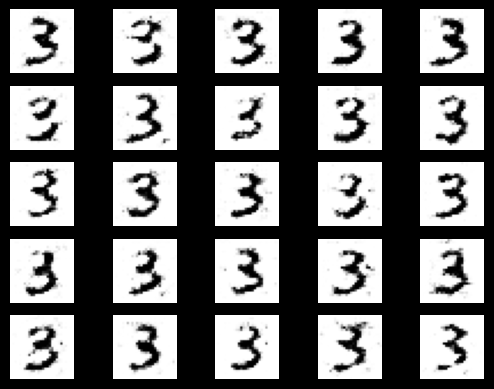

In [8]:
'''
# Load the generator model
generator = load_model('generator_model.h5', custom_objects={'CenterAround': CenterAround, 'wasserstein_loss': wasserstein_loss})

# Load the discriminator model
discriminator = load_model('discriminator_model.h5', custom_objects={'CenterAround': CenterAround, 'wasserstein_loss': wasserstein_loss})
'''

# Generate 25 images
generate_images(generator, latent_dim, 25)